In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
hikedata=pd.read_csv("HikesNYNJ.csv")


### webscraping Jupiter Notebook file  is on my github
### https://github.com/molinexx/Portfolio/blob/master/WEB%20SCRAPING%20FOR%20BOTH%20NJ%20and%20NY.ipynb

In [3]:
hikedata.head()

,Unnamed: 0,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed
0,0,Appalachian Trail North of Route 17A in Warwic...,Appalachian National Scenic Trail,Long Distance Trails,NY,Moderate,4.8,Views,Allowed on leash
1,1,Appalachian Trail on Bellvale Mountain,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,7.1,"Public Transportation, Views",Allowed on leash
2,2,Cat Rocks and Nuclear Lake on Appalachian Trai...,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,12.7,Views,Allowed on leash
3,3,Black Creek Preserve,Black Creek Preserve,Shawangunk Mountains,NY,Easy to Moderate,2.5,Views,Allowed on leash
4,4,Mt. Misery/Hill of Pines/Rattlesnake Hill/Blac...,Black Rock Forest,Storm King and Black Rock Forest,NY,Moderate to Strenuous,7.5,"Views, Waterfall",Allowed on leash


In [4]:
hikedata["TypeOfFeatures"]=hikedata.apply(lambda row: row.TypeOfFeatures.split(",") , axis=1)

In [5]:
hikedata.head()

,Unnamed: 0,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed
0,0,Appalachian Trail North of Route 17A in Warwic...,Appalachian National Scenic Trail,Long Distance Trails,NY,Moderate,4.8,[Views],Allowed on leash
1,1,Appalachian Trail on Bellvale Mountain,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,7.1,"[Public Transportation, Views]",Allowed on leash
2,2,Cat Rocks and Nuclear Lake on Appalachian Trai...,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,12.7,[Views],Allowed on leash
3,3,Black Creek Preserve,Black Creek Preserve,Shawangunk Mountains,NY,Easy to Moderate,2.5,[Views],Allowed on leash
4,4,Mt. Misery/Hill of Pines/Rattlesnake Hill/Blac...,Black Rock Forest,Storm King and Black Rock Forest,NY,Moderate to Strenuous,7.5,"[Views, Waterfall]",Allowed on leash


In [6]:
# creating new column with numerical representation of hike features
hikedata["NumberOfFeatures"]=hikedata.apply(lambda row: len(row.TypeOfFeatures), axis=1)

In [7]:
# creating hike ID column by renaming old column ang giving it new values
hikedata.rename(columns={"Unnamed: 0":"HikeID"}, inplace=True)

In [8]:
new_index=list(range(1,426))

hikedata["HikeID"]=new_index

In [9]:
hikedata.columns

Index(['HikeID', 'HikeName', 'ParkName', 'RegionName', 'State', 'Difficulity',
       'LenghtInMiles', 'TypeOfFeatures', 'DogsAllowed', 'NumberOfFeatures'],
      dtype='object')

In [10]:
hikedata.head(3)

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
0,1,Appalachian Trail North of Route 17A in Warwic...,Appalachian National Scenic Trail,Long Distance Trails,NY,Moderate,4.8,[Views],Allowed on leash,1
1,2,Appalachian Trail on Bellvale Mountain,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,7.1,"[Public Transportation, Views]",Allowed on leash,2
2,3,Cat Rocks and Nuclear Lake on Appalachian Trai...,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,12.7,[Views],Allowed on leash,1


In [11]:
hikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
HikeID              425 non-null int64
HikeName            425 non-null object
ParkName            425 non-null object
RegionName          425 non-null object
State               425 non-null object
Difficulity         425 non-null object
LenghtInMiles       425 non-null float64
TypeOfFeatures      425 non-null object
DogsAllowed         422 non-null object
NumberOfFeatures    425 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 33.3+ KB


#### in one column "DogsAllowed" is missing data 

In [12]:
hikedata[hikedata["DogsAllowed"].isnull()]

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
26,27,Giant Ledge and Panther,Catskill Park,Catskills,NY,Strenuous,6.6,[Views],NaN,1
254,255,Franklin Parker Preserve Loop,Franklin Parker Preserve,Pinelands,NJ,Moderate,10.5,"[Views, Woods]",NaN,2
292,293,Mill Creek Marsh Trail,Mill Creek Marsh,Watchungs,NJ,Easy,1.5,[Views],NaN,1


#### looks like those hiks are missing data. 
#### btw, the one in Catskills is an awesome hike, did it couple of time and dogs are allowed off the leash there 

In [13]:
# for other two hikes I wil check hhat is other park's policy and just fill accordingly
hikedata[hikedata["RegionName"]=="Pinelands"].head(2)

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
223,224,East Creek Trail,Belleplain State Forest,Pinelands,NJ,Easy,7.0,"[Bikes allowed, Fees]",Allowed on leash,2
248,249,Estell Manor Park,Estell Manor Park,Pinelands,NJ,Easy,8.5,[Historic feature],Allowed on leash,1


In [14]:
hikedata[hikedata["RegionName"]=="Watchungs"].head(2)

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
246,247,Eagle Rock Reservation Loop,Eagle Rock Reservation,Watchungs,NJ,Easy,3.5,[Views],Allowed on leash,1
253,254,Franklin Lakes Nature Preserve,Franklin Lakes Nature Preserve,Watchungs,NJ,Easy,2.0,[Views],Allowed on leash,1


In [15]:
# lookl like those two are also dog friendly, I will fill all three with the same info
hikedata["DogsAllowed"].fillna("Allowed on leash", inplace=True)

In [16]:
# just checking if it was filled correctly
hikedata.loc[254]

HikeID                                         255
HikeName            Franklin Parker Preserve Loop 
ParkName                  Franklin Parker Preserve
RegionName                               Pinelands
State                                           NJ
Difficulity                               Moderate
LenghtInMiles                                 10.5
TypeOfFeatures                     [Views,  Woods]
DogsAllowed                       Allowed on leash
NumberOfFeatures                                 2
Name: 254, dtype: object

In [17]:
hikedata["RegionName"].unique()

array(['Long Distance Trails', 'Shawangunk Mountains',
       'Storm King and Black Rock Forest', 'Westchester County',
       'Long Island', 'Rockland County', 'Catskills',
       'Harriman-Bear Mountain State Parks', 'Fahnestock State Park',
       'New York City', 'Palisades', 'East Hudson Highlands', 'Other NY',
       'Schunemunk Mountain', 'Sterling Forest', 'Dutchess County',
       'Southern Taconics', 'Bearfort Ridge and Wawayanda',
       'Jersey Shore', 'Kittatinnies', 'Wyanokies', 'Pinelands',
       'Morris County', 'Ramapo Mountains', 'Central Jersey', 'Watchungs'],
      dtype=object)

In [18]:
#print(list(hikedata["ParkName"].unique()))

###  ANALYSIS Part

In [19]:
#some qestions:
# 1.which region has the most trials by number?
# 2.which region has the most hikes that are strenuous?
# 3.which region has the most trials by lenght?
# 4.Which hikes is the longest and where is it?
# 5.What hike the most strenuous?
# 6.which hikes have the most features?
# 7.which region has the most hikes that feature swimming?
# 8.which park has the most hikes where one can have a dog off the leash?
# 9.show hikes in NY that are easy to moderate, are below 6 miles and have views.
# 10. Lets find hikes that are accesible by publlic transportation 

In [20]:
# general questions about data statistics 
hikedata.describe()

,HikeID,LenghtInMiles,NumberOfFeatures
count,425.000000,425.000000,425.000000
mean,213.000000,5.107529,1.802353
std,122.831185,2.514625,0.820431
min,1.000000,0.500000,1.000000
25%,107.000000,3.200000,1.000000
50%,213.000000,4.900000,2.000000
75%,319.000000,6.700000,2.000000
max,425.000000,15.400000,4.000000


#### average lengh of the hike is 6 miles 
#### the shortest hike is .5 miles long and the longest is 15.4 miles long
#### the average numbers of features is 1.9 with 4 being the most and each hike having at least one feature.
#### 50 % hikes is beteen 5 and 8 miles long

In [22]:
hikedata[hikedata['Difficulity'] == 'Strenuous'].describe()

,HikeID,LenghtInMiles,NumberOfFeatures
count,50.000000,50.000000,50.000000
mean,101.960000,6.674000,1.840000
std,83.133519,2.190127,0.817163
min,2.000000,1.500000,1.000000
25%,35.250000,5.000000,1.000000
50%,88.500000,6.900000,2.000000
75%,164.250000,8.000000,2.000000
max,425.000000,12.700000,4.000000


### Strenuous hikes are on average 6.7 miles long with the longest being 12.7 miles and the shortest 1.5 
#### There are total of 50 Strenuous hikes in Ny, NJ area
#### strenuous hiks have at least one feature with 4 being max number

In [124]:
print("Total lenght in miles: ", hikedata["LenghtInMiles"].sum(), 'miles')
print ("Total number of parks is: ", len(list (hikedata["ParkName"].unique())),"parks")

# there is a total of 2170.7  miles of hikes in area in 160 different State Parks in NJ and NY

Total lenght in miles:  2170.7 miles
Total number of parks is:  160 parks


In [25]:
dif= hikedata.groupby("Difficulity").agg({"Difficulity":"count"})
dif

,Difficulity
Difficulity,
Easy,89
Easy to Moderate,89
Moderate,134
Moderate to Strenuous,62
Strenuous,50
Very Strenuous,1


#### There are 50 Strenuous hikes with one being Very Strenuous.
#### 89 easy ones and 134 moderate

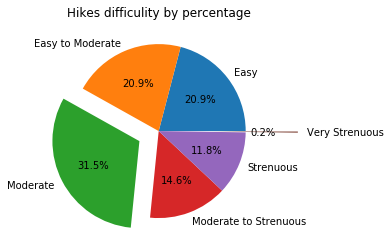

In [27]:
fig=plt.subplots()
explode=[0,0,.25,0,0,.6]
labels=["Easy","Easy to Moderate", "Moderate", "Moderate to Strenuous", "Strenuous", "Very Strenuous"]
fig=plt.pie(dif['Difficulity'], labels=labels, autopct='%1.1f%%', explode=explode)
plt.title("Hikes difficulity by percentage")
plt.show()

#### 31 percent of the hikes is moderate 

## How NY and NJ compare against each other?

In [29]:
ny_nj=hikedata.groupby("State").agg({"HikeID":"count"}).reset_index()

In [30]:
ny_nj

,State,HikeID
0,NJ,211
1,NY,214


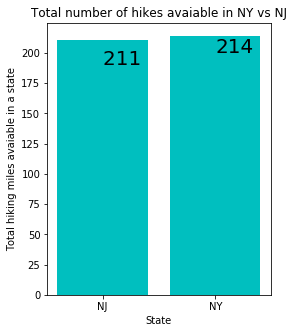

In [31]:
fig,ax=plt.subplots()
ax.bar(ny_nj["State"], ny_nj["HikeID"], color="c")
#ax.set_xticklabels(westchester_df["ParkName"], rotation=90)
fig.set_size_inches([4,5])
ax.set_ylabel("Total hiking miles avaiable in a state")
plt.title("Total number of hikes avaiable in NY vs NJ")
ax.set_xlabel("State")
ax.annotate("214",  xy=["NY",200], size=20)
                  
ax.annotate("211 ", xy=["NJ", 190], size=20)
plt.show()

### NY has more hikes then NJ 

In [110]:
state_dif_cross=pd.crosstab(hikedata['State'], hikedata["Difficulity"])
state_dif_cross

Difficulity,Easy,Easy to Moderate,Moderate,Moderate to Strenuous,Strenuous,Very Strenuous
State,,,,,,
NJ,64,57,65,23,2,0
NY,25,32,69,39,48,1


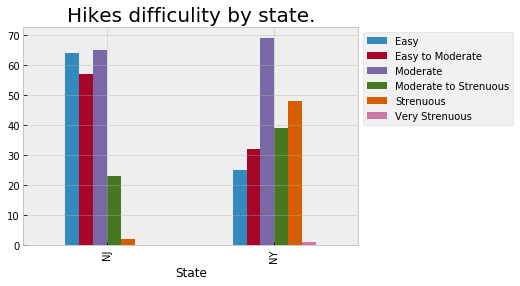

In [116]:
state_dif_cross.plot.bar()
plt.legend( loc=0,bbox_to_anchor=(1,1))
plt.title("Hikes difficulity by state.", size=20)

plt.show()

###  NY has much more moderate and strenuous hikes then NJ, while NJ had much more easy hikes.

### __________________________________________________________________________________________________

## 1. Which Region has the MOST hikes?

In [32]:
region_most_hikes=hikedata.groupby('RegionName').agg({"HikeID":"count"}).sort_values(by="HikeID", ascending=False).nlargest(5, 'HikeID').reset_index()

In [33]:
region_most_hikes

,RegionName,HikeID
0,Harriman-Bear Mountain State Parks,49
1,Ramapo Mountains,39
2,Morris County,39
3,Westchester County,31
4,Catskills,27


#### the most trails is in Harriman-Bear Mountain State Park - 49 hikes 
#### let's see it in on the graph

In [35]:
regions=hikedata["RegionName"].unique()

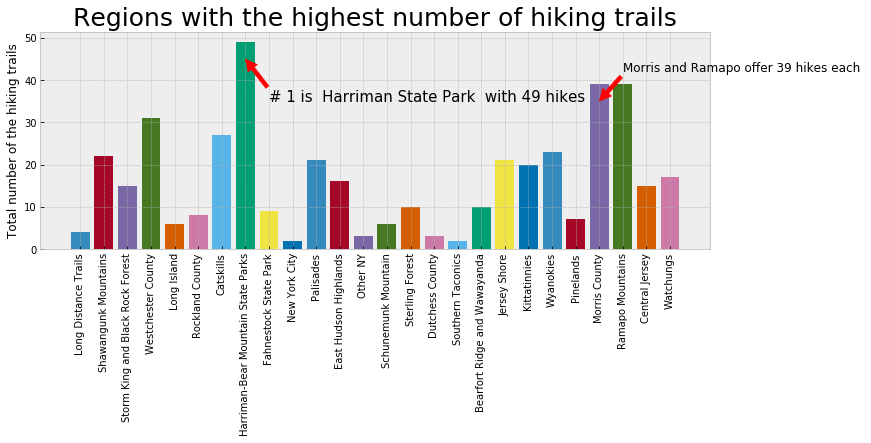

In [36]:
plt.style.use("bmh")
fig,ax=plt.subplots()
for hikes in regions:
    hikes_df=hikedata[hikedata["RegionName"]==hikes]
    ax.bar(hikes,hikes_df["LenghtInMiles"].count())
    
ax.set_ylabel("Total number of the hiking trails")
ax.set_xticklabels(regions, rotation=90)
fig.set_size_inches([12,4])
plt.title("Regions with the highest number of hiking trails", size=25)
ax.annotate("# 1 is  Harriman State Park  with 49 hikes", xytext=["Fahnestock State Park", 35], xy=["Harriman-Bear Mountain State Parks",45],
            arrowprops={ "color":"red"}, size=15)      
ax.annotate("Morris and Ramapo offer 39 hikes each ", xy=["Morris County", 35], xytext=["Ramapo Mountains", 42],
             arrowprops={ "color":"red"}, size=12 )
plt.show()

#### this graph shows that Harriman has the most hikes, follow by Westchester County region, but what parks are in Westchester? and which one has the most hiking trails counted in total miles?

In [37]:
westchester_df=hikedata[hikedata["RegionName"]=="Westchester County"]

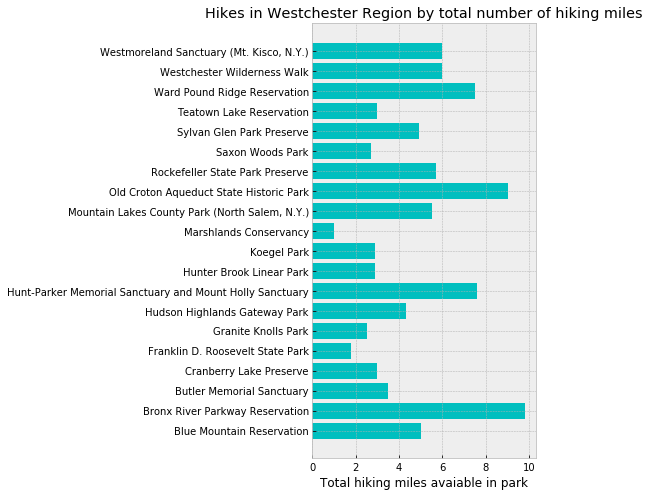

In [38]:

fig,ax=plt.subplots()
ax.barh(westchester_df["ParkName"], westchester_df["LenghtInMiles"], color="c")
#ax.set_xticklabels(westchester_df["ParkName"], rotation=90)
fig.set_size_inches([4,8])
ax.set_xlabel("Total hiking miles avaiable in park")
plt.title("Hikes in Westchester Region by total number of hiking miles")
plt.show()

#### Bronx River Parkway Reservation have total of 10 miles of hiking trails

# 2. Which region has the biggest number of strenuous hikes?

In [39]:
hikes_Strenuous=hikedata[hikedata["Difficulity"]=="Strenuous"]
#hikes_Strenuous

In [40]:
hikes_Strenuous_df=hikes_Strenuous.groupby(['RegionName']).agg({"HikeID":"count"}).sort_values(by="HikeID", ascending=False)
hikes_Strenuous_df

,HikeID
RegionName,
Catskills,16
East Hudson Highlands,8
Harriman-Bear Mountain State Parks,8
Schunemunk Mountain,6
Long Distance Trails,3
Shawangunk Mountains,2
Dutchess County,1
Kittatinnies,1
Other NY,1


In [41]:
#hikedata.groupby(['RegionName',"Difficulity"]).agg({"Difficulity":"count"}) # a detail list


####  Catskills region has the most strenous hikes, 16 in total 
####  second is Harriman SP with 8

# 3.Which region has the most trails  by total lenght?

In [42]:
hikedata.groupby("RegionName").agg({"LenghtInMiles":"sum"}).sort_values(by="LenghtInMiles", ascending=False).head(20)

,LenghtInMiles
RegionName,
Harriman-Bear Mountain State Parks,277.6
Catskills,186.5
Ramapo Mountains,185.2
Morris County,163.4
Westchester County,144.5
Shawangunk Mountains,142.4
Kittatinnies,105.3
Wyanokies,92.3
Jersey Shore,86.1


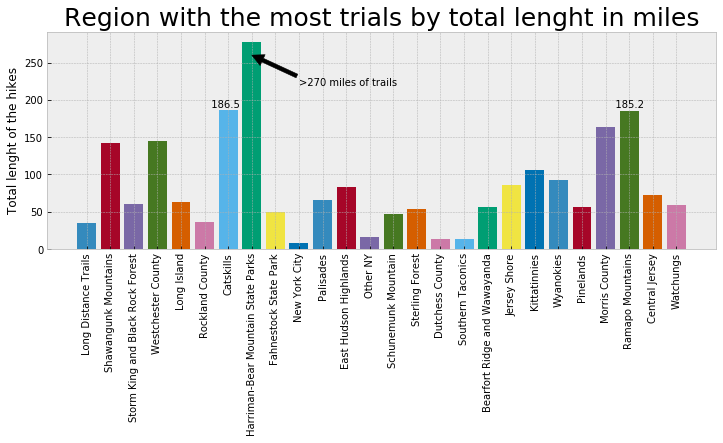

In [43]:
fig,ax=plt.subplots()
for hikes in regions:
    hikes_df=hikedata[hikedata["RegionName"]==hikes]
    ax.bar(hikes,hikes_df["LenghtInMiles"].sum())
    
ax.set_ylabel("Total lenght of the hikes")
ax.set_xticklabels(regions, rotation=90)
fig.set_size_inches([12,4])

ax.annotate(">270 miles of trails", xytext=["New York City", 220], xy=["Harriman-Bear Mountain State Parks",260], arrowprops={"color":"black"})
ax.annotate("  186.5", xy=["Rockland County", 190])
ax.annotate("   185.2", xy=["Morris County", 190])
            
plt.title("Region with the most trials by total lenght in miles", size=25)
plt.show()

### What is the average lenght of hike for each region?

In [44]:
regions=hikedata["RegionName"].unique()

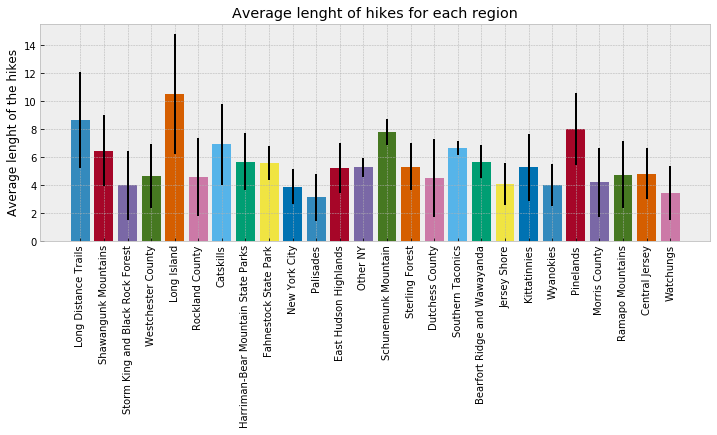

In [45]:
fig,ax=plt.subplots()
for hikes in regions:
    hikes_df=hikedata[hikedata["RegionName"]==hikes]
    ax.bar(hikes,hikes_df["LenghtInMiles"].mean(), yerr=hikes_df["LenghtInMiles"].std())
    
ax.set_ylabel("Average lenght of the hikes")
ax.set_xticklabels(regions, rotation=90)
fig.set_size_inches([12,4])
plt.title("Average lenght of hikes for each region")
plt.show()

##### lookls like Long Island have the hihest average lenght of the hike but also the highest standart diviation 

### What is the distribution of differnt lenghts in those both parks

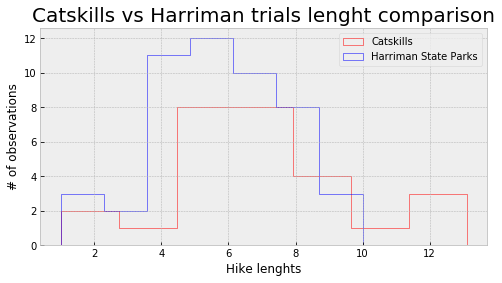

In [46]:
plt.style.use("bmh")
fig,ax=plt.subplots()
ax.hist(hikedata[hikedata["RegionName"]=="Catskills"]["LenghtInMiles"], label="Catskills", bins=7, histtype="step",color="r")
ax.hist(hikedata[hikedata["RegionName"]=="Harriman-Bear Mountain State Parks"]["LenghtInMiles"], label="Harriman State Parks",bins=7, histtype="step",color="b")
ax.set_xlabel("Hike lenghts")
ax.set_ylabel("# of observations")
plt.title("Catskills vs Harriman trials lenght comparison", size=20)
fig.set_size_inches([8,4])
ax.legend()
plt.show()

#### Looks like harriman has more hikes that have lenght between 4 and 6 , while distribution for Catskills is more even with a gentle splike in number of hikes that are 5 to 7 miles long. Catskills also have more hikes that are longer then 10 miles.

In [47]:
#Harriman-Bear Mountain State Parks has total of 277.6 miles of trails. but how about the exact State Park?

hikedata.groupby("ParkName").agg({"LenghtInMiles":"sum"}).sort_values(by="LenghtInMiles", ascending=False).sort_values(by="LenghtInMiles", ascending=False).nlargest(5, 'LenghtInMiles')
# looks like the answer is the same 

,LenghtInMiles
ParkName,
Harriman-Bear Mountain State Parks,275.1
Catskill Park,186.5
Hudson Highlands State Park Preserve,75.6
Norvin Green State Forest,69.4
Minnewaska State Park Preserve,53.8


# 4.Which hikes is the longest and where is it?

In [48]:
max_lenght= hikedata["LenghtInMiles"].max()
hikedata[hikedata["LenghtInMiles"]==max_lenght]

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
44,45,Long Island Greenbelt Trail,Connetquot River State Park Preserve,Long Island,NY,Moderate,15.4,"[Historic feature, Public Transportation, Wa...",No Dogs,3


In [49]:
# hmm...hikes in Long Island? 

# 5.What is the most strenuous hike and where is it?

In [50]:
hikedata[hikedata["Difficulity"]=="Very Strenuous"]

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
36,37,Devils Path East Section,Catskill Park,Catskills,NY,Very Strenuous,13.1,[Views],Allowed off leash,1


### TOP 5 most strenous hikes

In [51]:
hikedata[(hikedata["Difficulity"]=="Strenuous") &(hikedata["LenghtInMiles"]> hikedata["LenghtInMiles"].mean())].sort_values(by="LenghtInMiles", ascending=False).nlargest(5,"LenghtInMiles")

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
2,3,Cat Rocks and Nuclear Lake on Appalachian Trai...,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,12.7,[Views],Allowed on leash,1
19,20,Long Path over Romer Mountain,Catskill Park,Catskills,NY,Strenuous,12.0,"[Fees, Views]",Allowed off leash,2
175,176,Long Path and Shawangunk Ridge Trail (Wurtsbor...,Shawangunk Ridge Trail,Long Distance Trails,NY,Strenuous,10.0,[Views],Allowed on leash,1
79,80,"Suffern to Sloatsburg via S-BM, Kakiat and Pin...",Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Strenuous,9.2,[Views],Allowed on leash,1
37,38,Kanape Brook and Ashokan High Point,Catskill Park,Catskills,NY,Strenuous,9.2,"[Historic feature, Views]",Allowed off leash,2


# 6. Which hikes have the most features?


In [52]:
hikedata[hikedata["NumberOfFeatures"]==hikedata["NumberOfFeatures"].max()]

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
90,91,Bear Mountain Summit Loop,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Easy to Moderate,1.3,"[Accessible, Historic feature, Views, Woods]",Allowed on leash,4
104,105,High Line from the WTC Site via The Esplanade ...,"High Line, The Esplanade, Hudson River Park",New York City,NY,Easy to Moderate,4.8,"[Accessible, Historic feature, Public Transp...",No Dogs,4
130,131,Cliff Edge Overlook and Indian Ladder via the ...,John Boyd Thacher State Park,Other NY,NY,Easy,5.7,"[Historic feature, Views, Waterfall, Woods]",Allowed on leash,4
141,142,Mossy Glen/Blueberry Run/Castle Point Carriage...,Minnewaska State Park Preserve,Shawangunk Mountains,NY,Moderate,8.7,"[Fees, Swimming, Views, Waterfall]",Allowed on leash,4
152,153,"Dickie Barre, Peters Kill and Awosting Falls L...",Mohonk Preserve and Minnewaska State Park Pres...,Shawangunk Mountains,NY,Strenuous,7.8,"[Historic feature, Fees, Views, Waterfall]",Allowed on leash,4
159,160,Old Croton Aqueduct from Tarrytown to Ossining,Old Croton Aqueduct State Historic Park,Westchester County,NY,Easy to Moderate,9.0,"[Bikes allowed, Historic feature, Public Tra...",Allowed on leash,4
192,193,Sylvan Glen Park Preserve Shorter Loop,Sylvan Glen Park Preserve,Westchester County,NY,Easy,3.6,"[Bikes allowed, Historic feature, Views, Wo...",Allowed on leash,4
281,282,Loantaka Brook Reservation,Loantaka Brook Reservation,Morris County,NJ,Easy,7.0,"[Bikes allowed, Historic feature, Horses all...",Allowed on leash,4
323,324,Giant Stairs/Long Path Loop from State Line Lo...,Palisades Interstate Park - New Jersey Section,Palisades,NJ,Strenuous,4.5,"[Historic feature, Public Transportation, Vi...",Allowed on leash,4
324,325,Shore Trail Lollipop-Loop Hike from Alpine Boa...,Palisades Interstate Park - New Jersey Section,Palisades,NJ,Easy to Moderate,3.5,"[Historic feature, Fees, Views, Waterfall]",Allowed on leash,4


#### I want to check, is there is relatonship between lenght of the hike and number or  between features and difficulity

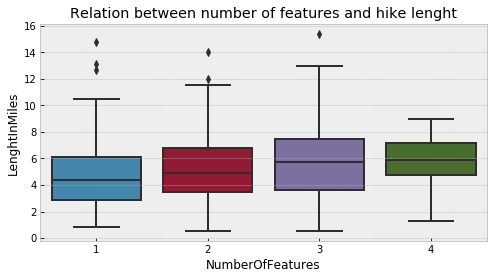

In [53]:
fig,ax=plt.subplots()
ax=sns.boxplot(x="NumberOfFeatures",y="LenghtInMiles" ,data=hikedata)
#ax.legend()
fig.set_size_inches([8,4])
plt.title("Relation between number of features and hike lenght")
plt.show()

#### looks like there is a slight  relation between  number of features  and the lenght of the hike, on average hikes with  one feature are 4 miles long, while hikes with four features are six miles long. On top of that hikes with one  feature have a few outliers that can skew the data, in reality making those hikes on average even shorter. 

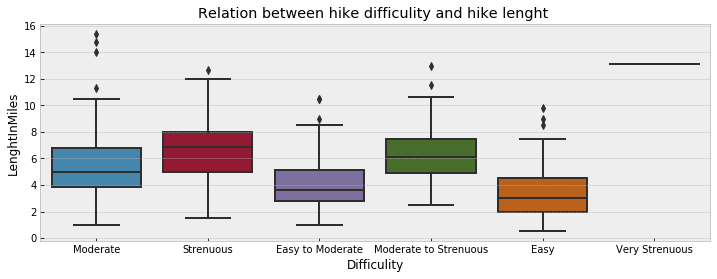

In [54]:
fig,ax=plt.subplots()
ax=sns.boxplot(x="Difficulity",y="LenghtInMiles" ,data=hikedata)
#ax.legend()
fig.set_size_inches([12,4])
plt.title("Relation between hike difficulity and hike lenght ")
plt.show()

#### Here I  can see that there is a slight relation between easy hikes and length:  easy hikes tend to be a bit shorter.


# 7.  Which region has the most hikes that feature swimming?


In [55]:
hikedata.groupby(hikedata["TypeOfFeatures"].apply(lambda x: " Swimming" in x or "Swimming" in x)).size()

TypeOfFeatures
False    406
True      19
dtype: int64

In [56]:
# there is total of 10 hikes that feature swimming

In [57]:
swimm_index=(hikedata["TypeOfFeatures"].apply(lambda x: " Swimming" in x or "Swimming" in x))

In [58]:
swimming_hikes=hikedata[swimm_index==True]
swimming_hikes.groupby("ParkName").agg({"HikeID":"count"})

,HikeID
ParkName,
Black Rock Forest,2
Catskill Park,2
High Point State Park,1
Lewis Morris County Park,1
Minnewaska State Park Preserve,5
Mohonk Preserve,1
Norvin Green State Forest,3
Ringwood State Park,3
Wawayanda State Park,1


#### Minnewaska State Park Preserve have the most hikies that feature swimming

In [59]:
# list of those hikes:
hikedata[swimm_index==True]

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
5,6,Black Rock Mountain/Hill of Pines/Rattlesnake ...,Black Rock Forest,Storm King and Black Rock Forest,NY,Strenuous,8.4,"[Swimming, Views]",Allowed on leash,2
8,9,Sutherland Pond/Scenic Trail/Eagle Cliff Loop ...,Black Rock Forest,Storm King and Black Rock Forest,NY,Moderate,6.5,"[Historic feature, Swimming, Views]",Allowed on leash,3
31,32,Catskill Escarpment Loop (South) from Scutt Ro...,Catskill Park,Catskills,NY,Moderate,4.7,"[Historic feature, Swimming, Views]",Allowed on leash,3
33,34,Mud Pond/Trout Pond Loop,Catskill Park,Catskills,NY,Moderate,4.8,[Swimming],Allowed off leash,1
138,139,Mossy Glen/Blueberry Run/Rainbow Falls/Hamilto...,Minnewaska State Park Preserve,Shawangunk Mountains,NY,Moderate,9.1,"[Fees, Swimming, Views]",Allowed on leash,3
139,140,Gertrude's Nose Loop/Millbrook Mountain,Minnewaska State Park Preserve,Shawangunk Mountains,NY,Moderate to Strenuous,7.0,"[Fees, Swimming, Views]",Allowed on leash,3
141,142,Mossy Glen/Blueberry Run/Castle Point Carriage...,Minnewaska State Park Preserve,Shawangunk Mountains,NY,Moderate,8.7,"[Fees, Swimming, Views, Waterfall]",Allowed on leash,4
143,144,Castle Point Carriage Road/Lake Awosting Carri...,Minnewaska State Park Preserve,Shawangunk Mountains,NY,Moderate,8.5,"[Fees, Swimming, Views]",Allowed on leash,3
144,145,Beacon Hill and Lake Minnewaska Easy Loop,Minnewaska State Park Preserve,Shawangunk Mountains,NY,Easy to Moderate,3.0,"[Fees, Swimming, Views]",Allowed on leash,3
147,148,Old Minnewaska Trail and Undivided Lot Trail,Mohonk Preserve,Shawangunk Mountains,NY,Moderate to Strenuous,7.5,"[Fees, Swimming, Views]",Allowed on leash,3


# 8. Which park has the most hikes where one can have a dog off the leash?


In [60]:
hikedata[hikedata["DogsAllowed"]=="Allowed off leash"].groupby("ParkName").agg({"DogsAllowed":"count"})

,DogsAllowed
ParkName,
Abram Hewitt State Forest,1
Catskill Park,21
Rockleigh Woods Sanctuary,2


In [61]:
# looks like Catskills Region has 21 hikes where dogs can be off the leash

# 9. Show hikes in NY that are easy to moderate, are below 6 miles and have views.

In [62]:
views_index=(hikedata["TypeOfFeatures"].apply(lambda x: "Views" in x or " Views" in x))

In [63]:
hikedata.groupby(views_index).size()

TypeOfFeatures
False     73
True     352
dtype: int64

In [64]:
# there is 189 hikes with views

In [65]:
views_data=hikedata[views_index==True]

In [66]:
# now lets see which of them meet additional criteria such as dificulity level and lenght 

In [67]:
views_data[(views_data["Difficulity"]=="Easy to Moderate") &  (views_data["LenghtInMiles"]<6) & (views_data["State"]=="NY")]

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
3,4,Black Creek Preserve,Black Creek Preserve,Shawangunk Mountains,NY,Easy to Moderate,2.5,[Views],Allowed on leash,1
9,10,Scenic Trail to Jupiter's Boulder,Black Rock Forest,Storm King and Black Rock Forest,NY,Easy to Moderate,3.0,"[Views, Waterfall, Woods]",Allowed on leash,3
11,12,Blue Mountain Reservation Loop,Blue Mountain Reservation,Westchester County,NY,Easy to Moderate,5.0,"[Bikes allowed, Views]",Allowed on leash,2
14,15,"Butler Memorial Sanctuary (Mt. Kisco, NY)",Butler Memorial Sanctuary,Westchester County,NY,Easy to Moderate,3.5,"[Views, Woods]",Allowed on leash,2
15,16,Buttermilk Falls in Rockland County,Buttermilk Falls County Park,Rockland County,NY,Easy to Moderate,1.2,"[Views, Waterfall]",Allowed on leash,2
46,47,Dater Mountain Nature Park,Dater Mountain Nature Park,Harriman-Bear Mountain State Parks,NY,Easy to Moderate,2.5,"[Views, Woods]",Allowed on leash,2
53,54,Catfish Loop Trail,Fahnestock State Park,Fahnestock State Park,NY,Easy to Moderate,4.9,[Views],Allowed on leash,1
69,70,Iron Mines Short Loop,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Easy to Moderate,3.7,"[Historic feature, Views]",Allowed on leash,2
82,83,Lake Sebago and Stony Brook in Harriman State ...,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Easy to Moderate,5.1,[Views],Allowed on leash,1
90,91,Bear Mountain Summit Loop,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Easy to Moderate,1.3,"[Accessible, Historic feature, Views, Woods]",Allowed on leash,4


## 10. Lets find hikes that are accesible by publlic transportation 

In [68]:
public_transportation_index=(hikedata["TypeOfFeatures"].apply(lambda x: "Public Transportation" in x or " Public Transportation" in x))

In [69]:
public_transport_data=hikedata[public_transportation_index==True]
public_transport_data

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
1,2,Appalachian Trail on Bellvale Mountain,Appalachian National Scenic Trail,Long Distance Trails,NY,Strenuous,7.1,"[Public Transportation, Views]",Allowed on leash,2
12,13,Stump Pond Loop Trail,Blydenburgh County Park,Long Island,NY,Easy,5.4,"[Historic feature, Public Transportation, Vi...",Allowed on leash,3
13,14,Bronx River Pathway,Bronx River Parkway Reservation,Westchester County,NY,Easy,9.8,"[Public Transportation, Views]",Allowed on leash,2
44,45,Long Island Greenbelt Trail,Connetquot River State Park Preserve,Long Island,NY,Moderate,15.4,"[Historic feature, Public Transportation, Wa...",No Dogs,3
56,57,Green Pond/Boston Mine Longer Loop from Elk Pen,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate to Strenuous,4.3,"[Historic feature, Public Transportation, Vi...",Allowed on leash,3
...,...,...,...,...,...,...,...,...,...,...
329,330,Huyler's Landing Trail/Closter Dock Trail Loop...,Palisades Interstate Park - New Jersey Section,Palisades,NJ,Moderate,5.0,"[Historic feature, Public Transportation, Vi...",Allowed on leash,3
338,339,Pyramid Mountain and Kakeout Reservoir from Ka...,Pyramid Mountain Natural Historic Area,Morris County,NJ,Moderate,8.7,"[Public Transportation, Views]",Allowed on leash,2
348,349,Indian Rock/Wanaque Ridge Trail Loop,Ramapo Mountain State Forest,Ramapo Mountains,NJ,Moderate,6.0,"[Public Transportation, Views]",Allowed on leash,2
381,382,Saddle River Pathway,Saddle River County Park,Ramapo Mountains,NJ,Easy,6.0,"[Bikes allowed, Historic feature, Public Tra...",Allowed on leash,3


### Which state has more hikes with public transportation

In [70]:
public_transport_data.groupby("State").size()

State
NJ    17
NY    44
dtype: int64

### What are the parks that are available by public transportation? And what is the total lenght of the hikes in them?

In [71]:
pubic_trans_df=public_transport_data.groupby(["State", "RegionName"]).agg({"LenghtInMiles":"sum"}).sort_values(by="LenghtInMiles").reset_index()
pubic_trans_df

,State,RegionName,LenghtInMiles
0,NJ,Bearfort Ridge and Wawayanda,4.1
1,NY,Dutchess County,5.0
2,NY,Shawangunk Mountains,5.0
3,NY,Long Distance Trails,7.1
4,NJ,Central Jersey,7.5
5,NY,New York City,7.8
6,NJ,Wyanokies,10.0
7,NJ,Watchungs,10.9
8,NJ,Ramapo Mountains,12.0
9,NJ,Palisades,19.5


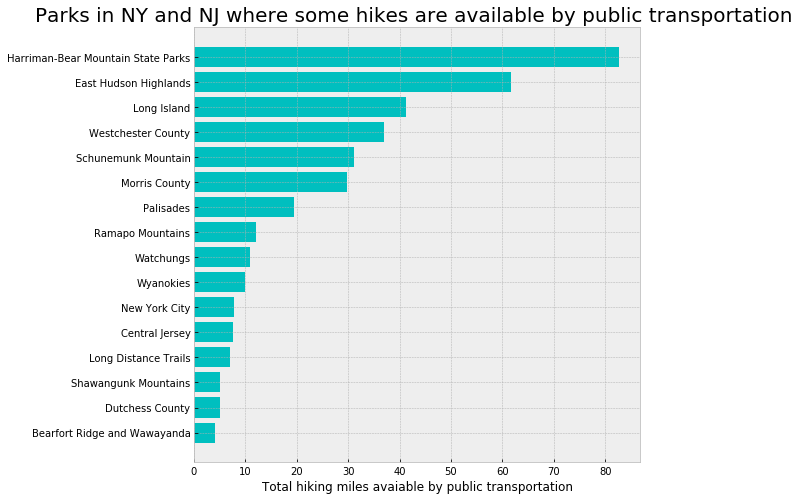

In [72]:
fig,ax=plt.subplots()
ax.barh(pubic_trans_df["RegionName"], pubic_trans_df["LenghtInMiles"], color="c")
#ax.set_xticklabels(westchester_df["ParkName"], rotation=90)
fig.set_size_inches([8,8])
ax.set_xlabel("Total hiking miles avaiable by public transportation")
plt.title("Parks in NY and NJ where some hikes are available by public transportation ", size=20)
plt.show()

### Let's find hikes in Harriman SP and in Hudson Highlands that are available by public transportation.

In [73]:
selected_hikes_df=public_transport_data[(( public_transport_data["RegionName"]=="Harriman-Bear Mountain State Parks")| (public_transport_data["RegionName"]== "East Hudson Highlands"))
                                       & (public_transport_data["Difficulity"]!='Strenuous')]
                                

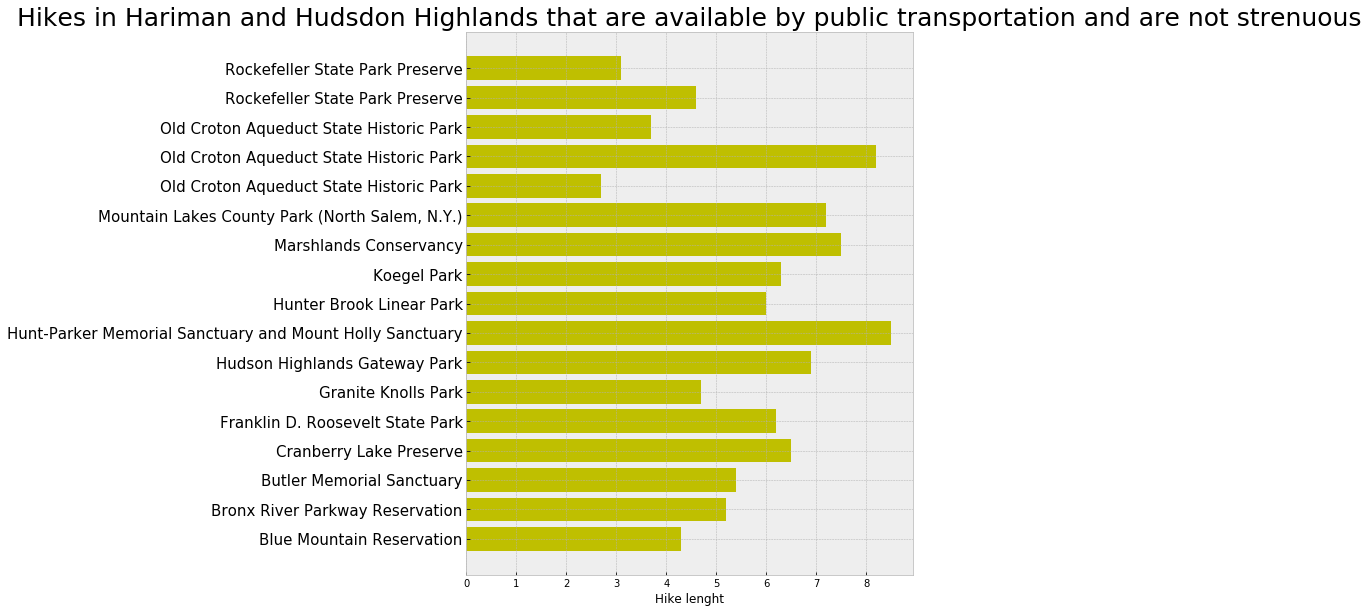

,HikeID,HikeName,ParkName,RegionName,State,Difficulity,LenghtInMiles,TypeOfFeatures,DogsAllowed,NumberOfFeatures
56,57,Green Pond/Boston Mine Longer Loop from Elk Pen,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate to Strenuous,4.3,"[Historic feature, Public Transportation, Vi...",Allowed on leash,3
60,61,Seven Hills/HTS/Reeves Brook Trail Loop to Ram...,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate,5.2,"[Public Transportation, Views]",Allowed on leash,2
62,63,Reeves Brook/Raccoon Brook Hills/Pine Meadow L...,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate to Strenuous,5.4,"[Public Transportation, Views]",Allowed on leash,2
64,65,Ramapo Torne/Raccoon Brook Hills Trail Loop fr...,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate,6.5,"[Public Transportation, Views, Waterfall]",Allowed on leash,3
73,74,Claudius Smith Rock Loop from Tuxedo,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate to Strenuous,6.2,"[Public Transportation, Views]",Allowed on leash,2
80,81,Almost Perpendicular/Claudius Smith Den Loop,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate to Strenuous,4.7,"[Public Transportation, Views]",Allowed on leash,2
86,87,Breakneck Mountain Loop from Diltzes Lane,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate,6.9,"[Public Transportation, Views]",Allowed on leash,2
87,88,Claudius Smith Den/Parker Cabin Mountain Loop,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate to Strenuous,8.5,"[Public Transportation, Views]",Allowed on leash,2
97,98,Dater Mountain Nature Park and Harriman State ...,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Easy to Moderate,6.0,"[Public Transportation, Views, Waterfall]",Allowed on leash,3
99,100,Diamond Mountain/Stony Brook Loop,Harriman-Bear Mountain State Parks,Harriman-Bear Mountain State Parks,NY,Moderate,6.3,"[Historic feature, Public Transportation, Vi...",Allowed on leash,3


In [84]:
fig,ax=plt.subplots()
ax.barh(selected_hikes_df["HikeName"], selected_hikes_df["LenghtInMiles"], color="y" )
ax.set_yticklabels(westchester_df["ParkName"], size=15)
fig.set_size_inches([8,10])
ax.set_xlabel("Hike lenght")
plt.title("Hikes in Hariman and Hudsdon Highlands that are available by public transportation and are not strenuous", size=25)
plt.show()

selected_hikes_df

### Most of the time to choose the hike we are based  at lenght and dfficulity, this is why I prepared an easy way  to pick a hike. 
### Hopefully you can find someing that will inspire you to get out of the city and spend some time outdoors!
## Happy Trails!!

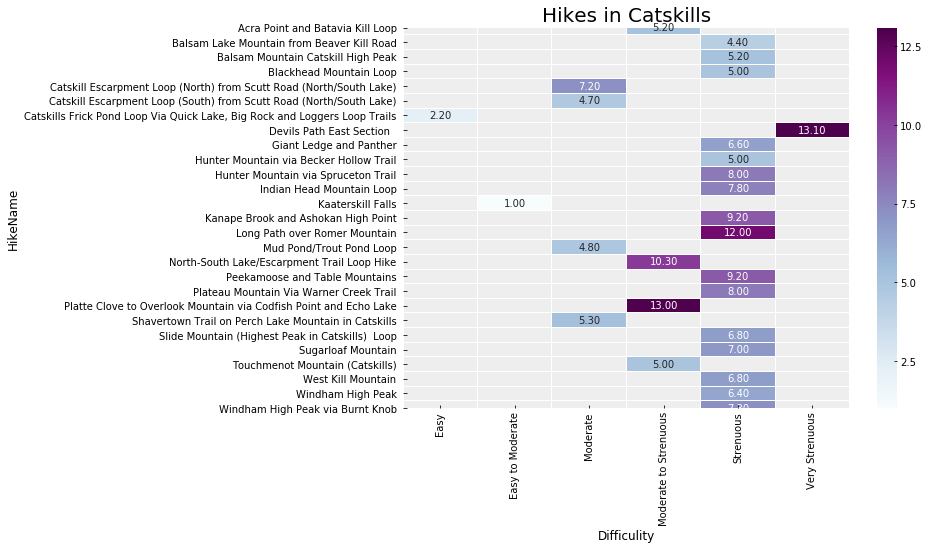

In [75]:
#Catskills
catskills_df=hikedata[hikedata["RegionName"]=="Catskills"]
catskills_piv=catskills_df.pivot("HikeName", "Difficulity","LenghtInMiles")
plt.figure(figsize = (10,7))
catskill_displ=sns.heatmap(catskills_piv, annot=True, fmt=".2f", cmap="BuPu", linewidth=.01)
plt.title("Hikes in Catskills", size=20)
plt.show()

Text(0.5, 1, 'Hikes in Shawangunk Mountains')

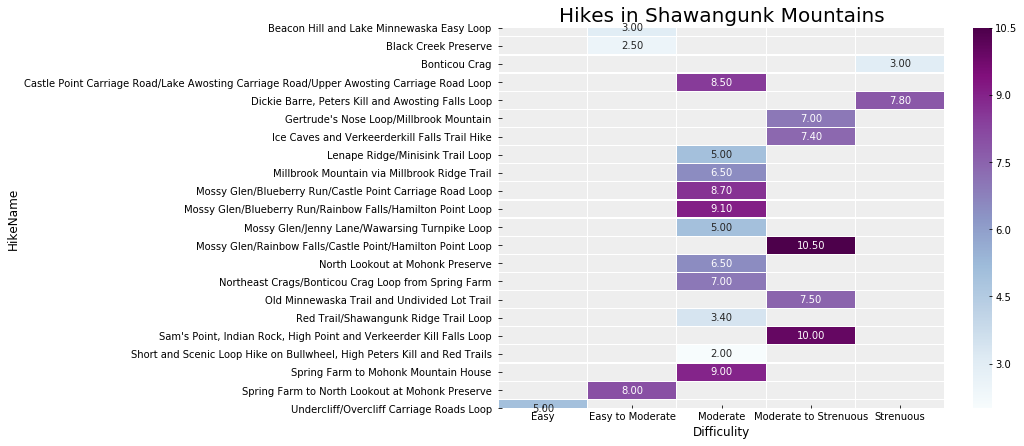

In [76]:
#Shawangunk Mountains
shawangunk_df=hikedata[hikedata["RegionName"]=="Shawangunk Mountains"]
shawangunk_piv=shawangunk_df.pivot("HikeName", "Difficulity","LenghtInMiles")
plt.figure(figsize = (10,7  ))
shawangunk_displ=sns.heatmap(shawangunk_piv, annot=True, fmt=".2f", cmap="BuPu", linewidth=.2)
plt.title("Hikes in Shawangunk Mountains", size=20)

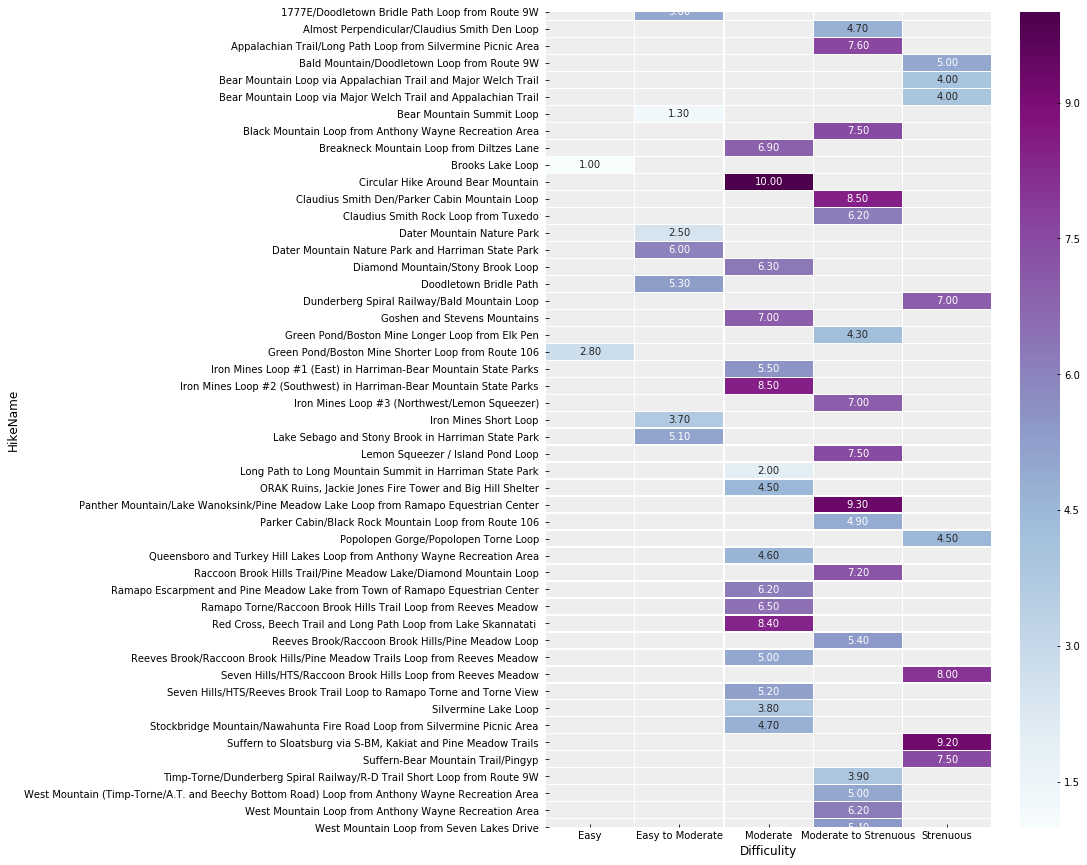

In [77]:
#Harriman-Bear Mountain State Parks
harriman_df=hikedata[hikedata["RegionName"]=="Harriman-Bear Mountain State Parks"]
harriman_piv=harriman_df.pivot("HikeName", "Difficulity","LenghtInMiles")
plt.figure(figsize = (10,15))
harriman_displ=sns.heatmap(harriman_piv, annot=True, fmt=".2f", cmap="BuPu",linewidth=.2)

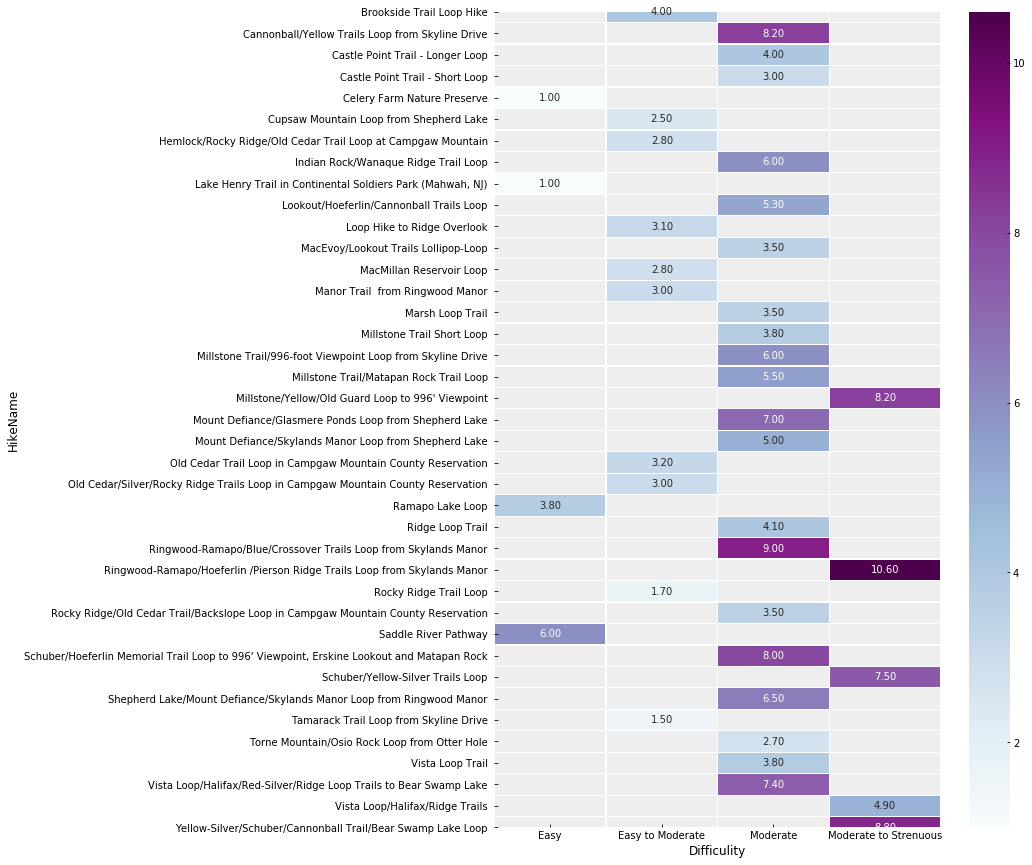

In [78]:
#Ramapo Mountains
ramapo_df=hikedata[hikedata["RegionName"]=="Ramapo Mountains"]
harriman_piv=ramapo_df.pivot("HikeName", "Difficulity","LenghtInMiles")
plt.figure(figsize = (10,15))
ramapo_displ=sns.heatmap(harriman_piv, annot=True, fmt=".2f", cmap="BuPu",linewidth=.2)


In [79]:
# another way to do it..

In [80]:
#create separate data frames for each level from data frame where all the hikes belong to one region
#for example here we using Catskills region 
hudson_df=hikedata[hikedata["RegionName"]=="East Hudson Highlands"]


easy=hudson_df[hudson_df["Difficulity"]=="Easy"]
easy_to_moderate= hudson_df[hudson_df["Difficulity"]=="Easy to Moderate"]
moderate= hudson_df[hudson_df["Difficulity"]=="Moderate"]
moderate_to_strenuous=hudson_df[hudson_df["Difficulity"]=="Moderate to Strenuous"]
strenuous=hudson_df[hudson_df["Difficulity"]=="Strenuous"]

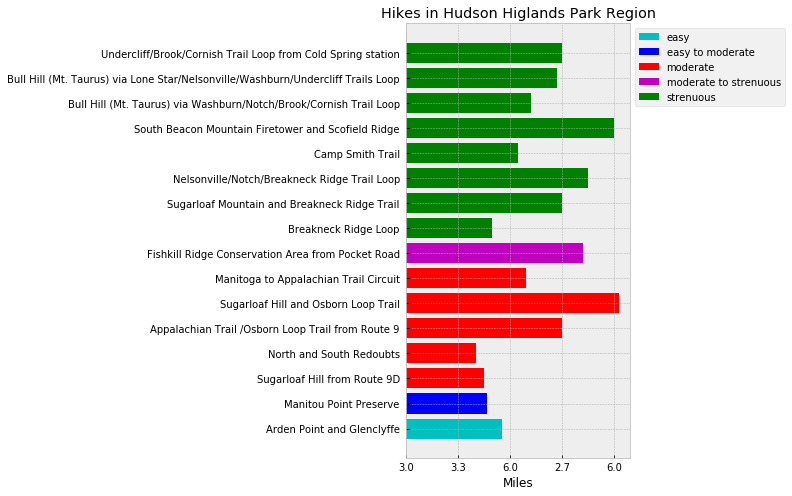

In [81]:
# then on one figure put all those hikes and then color-coding it

fig,ax=plt.subplots()
ax.barh(easy["HikeName"], easy["LenghtInMiles"], color="c", label="easy")
ax.barh(easy_to_moderate["HikeName"], easy_to_moderate["LenghtInMiles"], color="b", label="easy to moderate")
ax.barh(moderate["HikeName"], moderate["LenghtInMiles"], color="r",label="moderate")
ax.barh(moderate_to_strenuous["HikeName"], moderate_to_strenuous["LenghtInMiles"], color="m", label="moderate to strenuous")
ax.barh(strenuous["HikeName"], strenuous["LenghtInMiles"], color="g", label="strenuous")
ax.set_xticklabels(hudson_df["LenghtInMiles"] )
fig.set_size_inches([4,8])
ax.set_xlabel("Miles")
plt.title("Hikes in Hudson Higlands Park Region")
plt.legend(loc=0,bbox_to_anchor=(1,1))
plt.show()

In [82]:
# another way is to create dictionary that is colorcoding difernet levels of difficulity and then 
#use for loop to create visual
# the only problem here is that dctionary must be created separate from the loop

storm_king_df=hikedata[hikedata["RegionName"]=="Storm King and Black Rock Forest"]
dif_levels=storm_king_df["Difficulity"].unique()
colors=["c","b","r","m",'g']
if len(dif_levels)==len(colors):
    dif_dict=dict(zip(dif_levels,colors))
else: 
    print("list have different lenghts")

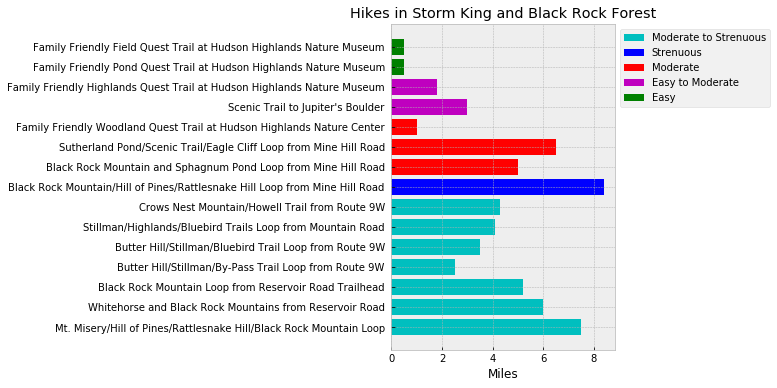

In [83]:
fig,ax=plt.subplots()
for dif,col in dif_dict.items():
    
    dif_df=storm_king_df[storm_king_df["Difficulity"]==dif]
    
    ax.barh(dif_df["HikeName"], dif_df["LenghtInMiles"], color=col,label=dif)
fig.set_size_inches([4,6])
#ax.set_xticklabels(storm_king_df["LenghtInMiles"] , rotation=90)
ax.set_xlabel("Miles")
plt.title("Hikes in Storm King and Black Rock Forest")    
plt.legend(loc=0,bbox_to_anchor=(1,1))
    
plt.show()

# Thank you!!

In [98]:
state_dif=hikedata.groupby(["Difficulity","State"]).agg({"HikeID":"count"}).reset_index()

In [99]:
state_dif

,Difficulity,State,HikeID
0,Easy,NJ,64
1,Easy,NY,25
2,Easy to Moderate,NJ,57
3,Easy to Moderate,NY,32
4,Moderate,NJ,65
5,Moderate,NY,69
6,Moderate to Strenuous,NJ,23
7,Moderate to Strenuous,NY,39
8,Strenuous,NJ,2
9,Strenuous,NY,48


In [102]:
state_dif_cross=pd.crosstab(hikedata['State'], hikedata["Difficulity"])
state_dif_cross

Difficulity,Easy,Easy to Moderate,Moderate,Moderate to Strenuous,Strenuous,Very Strenuous
State,,,,,,
NJ,64,57,65,23,2,0
NY,25,32,69,39,48,1


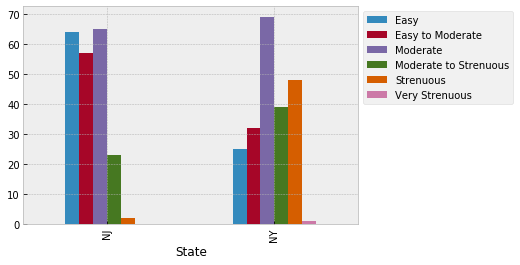